In [2]:
import math
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

cities = []

In [3]:
#A city is compose of its x and y coordinates
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate the distance between the city and the city in param
    def distanceTo(self, city):
        xDistance = abs(self.getX() - city.getX())
        yDistance = abs(self.getY() - city.getY())
        distance = math.sqrt( (xDistance*xDistance) + (yDistance*yDistance) )
        return distance
    
    def __repr__(self):
        return str(self.getX()) + ";" + str(self.getY())

    #return the coordinate X of the city
    def getX(self):
        return self.x
    
    #return the coordinate Y of the city
    def getY(self):
        return self.y

In [4]:
class Route:
    def __init__(self, route=None):
        self.route = []
        self.fitness = 0.0
        self.distance = 0
        if route is not None:
            self.route = route
        else:
            for i in range(0, len(cities)):
                self.route.append(None)

    def __repr__(self):
        geneString = ""
        for i in range(0, self.routeSize()):
            geneString += "[" + str(self.getCity(i)) + "]"
        return geneString
    
    #This function generate a new route by shuffling all city contains in the table of destinations city
    def generateIndividual(self):
        for cityIndex in range(0, len(cities)):
            self.setCity(cityIndex, cities[cityIndex])
        random.shuffle(self.route)
    
    def getCity(self, routePosition):
        return self.route[routePosition]
    
    def setCity(self, routePosition, city):
        self.route[routePosition] = city
        self.fitness = 0.0
        self.distance = 0
    
    def getFitness(self):
        if self.fitness == 0:
            self.fitness = 1/float(self.getDistance())
        return self.fitness
    
    def getDistance(self):
        if self.distance == 0:
            routeDistance = 0
            for cityIndex in range(0, self.routeSize()):
                fromCity = self.getCity(cityIndex)
                destinationCity = None
                if cityIndex+1 < self.routeSize():
                    destinationCity = self.getCity(cityIndex+1)
                else:
                    destinationCity = self.getCity(0)
                routeDistance += fromCity.distanceTo(destinationCity)
            self.distance = routeDistance
        return self.distance
    
    def routeSize(self):
        return len(self.route)
    
    def containsCity(self, city):
        return city in self.route



In [5]:
class Population:
    def __init__(self, populationSize, initialise):
        self.routes = []
        for i in range(0, populationSize):
            self.routes.append(None)
        
        if initialise:
            for i in range(0, populationSize):
                newRoute = Route()
                newRoute.generateIndividual()
                self.saveRoute(i, newRoute)
        
    def saveRoute(self, index, route):
        self.routes[index] = route
    
    def getRoute(self, index):
        return self.routes[index]
    
    def getFittest(self):
        fittest = self.routes[0]
        for i in range(0, self.populationSize()):
            if fittest.getFitness() <= self.getRoute(i).getFitness():
                fittest = self.getRoute(i)
        return fittest
    
    def populationSize(self):
        return len(self.routes)



In [6]:
class GA:
    def __init__(self):
        self.mutationRate = 0.015
        self.tournamentSize = 70
        self.elitism = True
    
    def evolvePopulation(self, pop):
        newPopulation = Population(pop.populationSize(), False)
        elitismOffset = 0
        if self.elitism:
            newPopulation.saveRoute(0, pop.getFittest())
            elitismOffset = 1
        
        for i in range(elitismOffset, newPopulation.populationSize()):
            parent1 = self.tournamentSelection(pop)
            parent2 = self.tournamentSelection(pop)
            child = self.crossover(parent1, parent2)
            newPopulation.saveRoute(i, child)
        
        for i in range(elitismOffset, newPopulation.populationSize()):
            self.mutate(newPopulation.getRoute(i))
        
        return newPopulation
    
    def crossover(self, parent1, parent2):
        child = Route()
        
        posA = int(random.random() * parent1.routeSize())
        posB = int(random.random() * parent1.routeSize())
        
        startPos = min(posA, posB)
        endPos = max(posA, posB)
        
        for i in range(startPos, endPos):
            child.setCity(i, parent1.getCity(i))
    
        for i in range(0, parent2.routeSize()):
            if not child.containsCity(parent2.getCity(i)):
                for ii in range(0, child.routeSize()):
                    if child.getCity(ii) == None:
                        child.setCity(ii, parent2.getCity(i))
                        break
        return child
    
    def mutate(self, route):
        for routePos1 in range(0, route.routeSize()):
            if random.random() < self.mutationRate:
                routePos2 = int(route.routeSize() * random.random())
                
                city1 = route.getCity(routePos1)
                city2 = route.getCity(routePos2)
                
                route.setCity(routePos2, city1)
                route.setCity(routePos1, city2)
    
    def tournamentSelection(self, pop):
        tournament = Population( self.tournamentSize, False)
        for i in range(0, self.tournamentSize):
            randomId = int(random.random() * pop.populationSize())
            tournament.saveRoute(i, pop.getRoute(randomId))
        fittest = tournament.getFittest()
        return fittest

In [7]:
def addRoutes(nameFile = None):
    if nameFile is None:
        RuntimeError("Name of file is required, cannot be None")
    
    tab = []

    #open ref file
    file = open(nameFile, 'r')
    for line in file:
        data = line.strip()
        if(data[0].isdigit()):
            data = data.split()
            
            for i in range(0, len(data)):
                data[i]=(int(data[i]))

            city = City(data[1], data[2])
            cities.append(city)
            tab.append(data)
    #close the file after the reading
    file.close()

Initial distance: 4125.904076606393
Finished
Final distance: 1355.9438866164899
Solution:
[0;39][0;27][5;25][15;43][18;45][28;47][28;43][28;40][34;41][41;36][71;11][71;13][71;16][64;22][48;22][38;20][34;26][34;29][33;26][32;26][15;13][18;15][25;11][25;9][5;13][0;13][5;19][0;26][5;31][18;29][18;27][18;21][18;19][15;19][18;17][25;15][34;5][48;6][77;21][74;24][48;27][38;30][18;25][15;25][11;10][12;5][8;0][2;0][5;8][18;23][28;28][33;31][74;29][84;24][84;29][107;27][84;6][80;5][81;17][84;20][41;23][28;16][18;13][15;8][18;11][78;32][84;34][84;38][79;37][78;35][79;33][74;35][51;47][51;45][41;35][38;34][32;31][33;29][34;31][35;31][41;34][41;32][40;22][35;17][34;15][33;15][15;37][18;41][18;42][18;44][18;39][63;6][74;6][79;10][80;10][78;10][28;34][25;26][12;10][9;10][10;10][18;33][18;35][34;38][78;39][80;41][74;39][71;45][71;47][61;47][61;45][57;44][56;25][57;25][74;20][74;16][74;12][57;12][38;16][28;20][25;22][25;23][25;24][28;30][25;29][25;28][18;31][15;31][18;37][5;37][5;43]


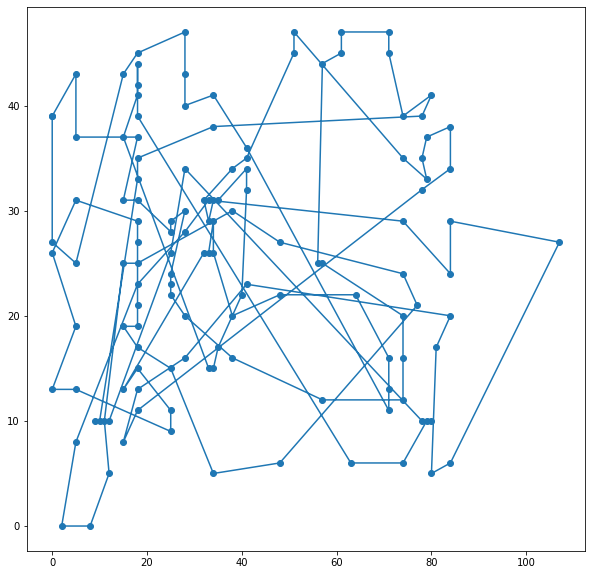

In [8]:
if __name__ == '__main__':
    
    addRoutes('xqf131.tsp')
    
    # Initialize population
    pop = Population(100, True)
    print ("Initial distance: " + str(pop.getFittest().getDistance()))
    
    # Evolve population for 50 generations
    ga = GA()
    p1 = Route()
    p2= Route()
    pop = ga.evolvePopulation(pop)
    for i in range(0, 500):
        pop = ga.evolvePopulation(pop)
    
    fittest = pop.getFittest()
    val = []
    for i in range (0, fittest.routeSize()):
        coordinates = [fittest.getCity(i).getX(), fittest.getCity(i).getY()]
        val.append(coordinates)
    coordFirst = [fittest.getCity(0).getX(), fittest.getCity(0).getY()]
    val.append(coordFirst)

    # Print final results
    print ("Finished")
    print ("Final distance: " + str(pop.getFittest().getDistance()))
    print ("Solution:")
    print (pop.getFittest())
    
    data = np.array(val)
    x, y = data.T
    fig= plt.figure(figsize=(10,10))
    plt.scatter(x,y)
    plt.plot(x,y)
    plt.show()